In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

conn_kids_HP_PAR = 'conn_ant-PC_child_riggins_etal_2016.csv'
uni_adults_PAR = 'ofen_2012_parietal_mem_resp_adults.csv'
uni_kids_PAR = 'ofen_2012_parietal_mem_resp_kids.csv'
rsa_kids_phpc = 'rsa_kids_fandakova_etal_2019.csv'

<AxesSubplot:xlabel='episodic', ylabel='antHPC_PC'>

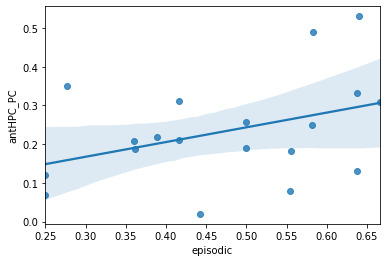

In [9]:
df = pd.read_csv(conn_kids_HP_PAR, header=1)
df.columns = ['episodic', 'antHPC_PC']
df.head()
sns.regplot(x='episodic', y='antHPC_PC', data=df)

In [11]:
import statsmodels.formula.api as smf
results = smf.ols('antHPC_PC ~ episodic', data=df).fit()
results.summary()

/Users/anthonydutcher/anaconda3/envs/TA/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              antHPC_PC   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     3.061
Date:                Tue, 06 Jul 2021   Prob (F-statistic):             0.0982
Time:                        12:46:12   Log-Likelihood:                 13.468
No. Observations:                  19   AIC:                            -22.94
Df Residuals:                      17   BIC:                            -21.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0533      0.107      0.498      0.625      -0.173       0.279
episodic       0.3801      0.217      1.750      0.098      -0.078       0.838
==============================================================================
Omnibus:                        0.539   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.411
Skew:                           0.323   Prob(JB):                        0.814
Kurtosis:                       2.680   Cond. No.                         9.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
conn_adults_HP_PAR = 'conn_PM_adults_cooper_etal_2021.csv'
df = pd.read_csv(conn_kids_HP_PAR, header=1)
# df.columns = ['episodic', 'antHPC_PC']
df.head()
    

,X,Y
0,0.276818,0.350000
1,0.249545,0.119697
2,0.249545,0.068182
3,0.360000,0.209091
4,0.361364,0.186364


In [111]:
from pingouin import ttest, anova
import pandas as pd
import numpy as np
uni_adults_PAR = 'ofen_2012_parietal_mem_resp_adults.csv'
uni_kids_PAR = 'ofen_2012_parietal_mem_resp_kids.csv'
uni_ages_PAR = 'ofen_2012_ages.csv'
max_val_kids = pd.read_csv(uni_kids_PAR, header=None).max()[1]
max_val_adults = pd.read_csv(uni_adults_PAR, header=None).max()[1]
ages = pd.read_csv(uni_ages_PAR, header=None)[1]
tests = list()
kid_sds = np.linspace(0.15, .3, 10)
n_kids = 27
n_adults = 18
for sd in kid_sds:
    par_resp = np.hstack([np.random.normal(max_val_kids, sd, n_kids).reshape([1,n_kids]), np.random.normal(max_val_adults, sd, n_adults).reshape([1,n_adults])])
    labels = np.hstack([np.repeat(['kid'], n_kids), np.repeat(['adult'],n_adults)])
    df = pd.DataFrame([par_resp[0], labels]).T
    df.columns = ['parietal resp', 'group']
    df['parietal resp'] = df['parietal resp'].astype('float')
    av = anova(data=df, dv='parietal resp', between='group')
    tests.append(np.array([sd, n_kids, n_adults, av.F[0], av.np2[0]]))

av = pd.DataFrame(tests, columns=['sd', 'N kid','N adult', 'F', 'es'])
av

,sd,N kid,N adult,F,es
0,0.150000,27.0,18.0,65.387570,0.603276
1,0.166667,27.0,18.0,51.546426,0.545197
2,0.183333,27.0,18.0,27.290785,0.388256
3,0.200000,27.0,18.0,37.855147,0.468185
4,0.216667,27.0,18.0,39.130071,0.476440
5,0.233333,27.0,18.0,48.268535,0.528863
6,0.250000,27.0,18.0,46.922387,0.521810
7,0.266667,27.0,18.0,15.748854,0.268071
8,0.283333,27.0,18.0,15.727015,0.267799
9,0.300000,27.0,18.0,6.640793,0.133777


In [110]:
effect_sizes = np.linspace(0.3, 0.8, 10)
power = 0.8
alpha = 0.05
power_analysis = FTestAnovaPower()
for es in effect_sizes:
    sample_size = power_analysis.solve_power(effect_size = es, 
                                             power = power, 
                                             alpha = alpha)

    print('Required sample size: {} for effect size: {}'.format(int(sample_size), es.round(4)))

Required sample size: 89 for effect size: 0.3
Required sample size: 64 for effect size: 0.3556
Required sample size: 48 for effect size: 0.4111
Required sample size: 38 for effect size: 0.4667
Required sample size: 30 for effect size: 0.5222
Required sample size: 25 for effect size: 0.5778
Required sample size: 21 for effect size: 0.6333
Required sample size: 18 for effect size: 0.6889
Required sample size: 16 for effect size: 0.7444
Required sample size: 14 for effect size: 0.8


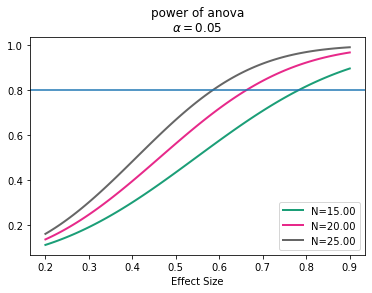

In [116]:
from statsmodels.stats.power import FTestAnovaPower
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1,1)
fig = FTestAnovaPower().plot_power(dep_var='effect_size',
                                 nobs = [15, 20, 25],
                                 effect_size=np.linspace(0.2, 0.9, 100),
                                 alpha = 0.05,
                                 ax=ax, title='power of anova' + '\n' + r'$\alpha = 0.05$')
plt.axhline(0.8)
# for xc in xcoords:
#     plt.axvline(x=xc)

In [115]:
uni_ages_PAR = 'ofen_2012_ages.csv'
max_val_kids = pd.read_csv(uni_kids_PAR, header=None).max()[1]
max_val_adults = pd.read_csv(uni_adults_PAR, header=None).max()[1]
ages = pd.read_csv(uni_ages_PAR, header=None)[1].values.astype('float')
ages

array([ 8.02967359,  8.29673591,  8.83086053,  9.30563798,  9.48367953,
        9.54302671,  9.42433234, 10.90801187, 11.88724036, 12.00593472,
       12.33234421, 11.23442136, 11.115727  , 10.8189911 ,  9.8694362 ,
        9.98813056, 10.37388724,  9.66172107,  8.59347181,  9.00890208,
        9.45400593, 10.13649852,  9.00890208,  9.83976261, 10.99703264,
        9.92878338, 12.51038576, 12.95548961, 19.00890208, 18.41543027,
       20.13649852, 21.85756677, 21.08605341, 21.35311573, 21.76854599,
       21.17507418, 21.82789318, 20.4925816 , 20.10682493, 20.13649852,
       19.92878338, 20.31454006, 19.27596439, 19.51335312, 18.47477745,
       19.12759644])